# Finance Data Project - Solutions

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html)


In [101]:
import pandas_datareader.data as web
import datetime as dt
import pandas as pd
import numpy as np
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use stooq as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'stooq', start, end)


In [69]:
start = dt.datetime(2006, 1, 1)
end = dt.datetime(2016, 1, 1)

In [70]:
# Bank of America
BAC = web.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = web.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = web.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = web.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = web.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = web.DataReader("WFC", 'stooq', start, end)

In [71]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'stooq', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [72]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [73]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [74]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [75]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   40.601  40.823  39.934  40.739  18832700.0  424.86  428.12   
2006-01-04   40.671  40.881  40.194  40.306  20521415.0  423.66  425.72   
2006-01-05   40.306  40.524  40.083  40.359  17129894.0  419.98  422.93   
2006-01-06   40.496  40.591  40.109  40.297  14554711.0  423.82  423.96   
2006-01-09   40.428  40.645  40.116  40.324  18050003.0  421.37  422.58   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   417.12  427.37  1773436.0  ...  39.082  39.981  38.782  39.856   
2006-01-04   419.19  419.46  2157907.0  ...  40.128  40.524  39.888  39.888   
2006-01-05   419.64  421.52  1309385.0  ...  39.888  40.053  39.656  39.997   
2006-01-06   417.91  421.52  1580368.0  ...  40.175  40.226  39.683  40.037   
2006-01-09   418.76  419.55  1938531.0  ...  40.075  40.532  40.068  40.456   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6529839.0  23.367  23.646  23.072  23.588  14898523.0  
2006-01-04   9688256.0  23.511  23.526  23.187  23.315  14700535.0  
2006-01-05   7016817.0  23.292  23.329  23.149  23.292  13701382.0  
2006-01-06   8366983.0  23.354  23.492  23.211  23.423  11365256.0  
2006-01-09   5033086.0  23.423  23.526  23.329  23.423   7599922.0  

[5 rows x 30 columns]

# EDA


** What is the max Close price for each bank's stock throughout the time period?**

In [76]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     47.505
C      489.090
GS     210.170
JPM     59.322
MS      61.043
WFC     48.384
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [77]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [78]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010629,-0.018509,-0.013638,-0.014266,0.000803,-0.011574
2006-01-05,0.001315,0.004911,-0.000371,0.003070,0.002733,-0.000986
2006-01-06,-0.001536,0.000000,0.013925,0.007063,0.001000,0.005624
2006-01-09,0.000670,-0.004674,0.011994,0.016230,0.010465,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

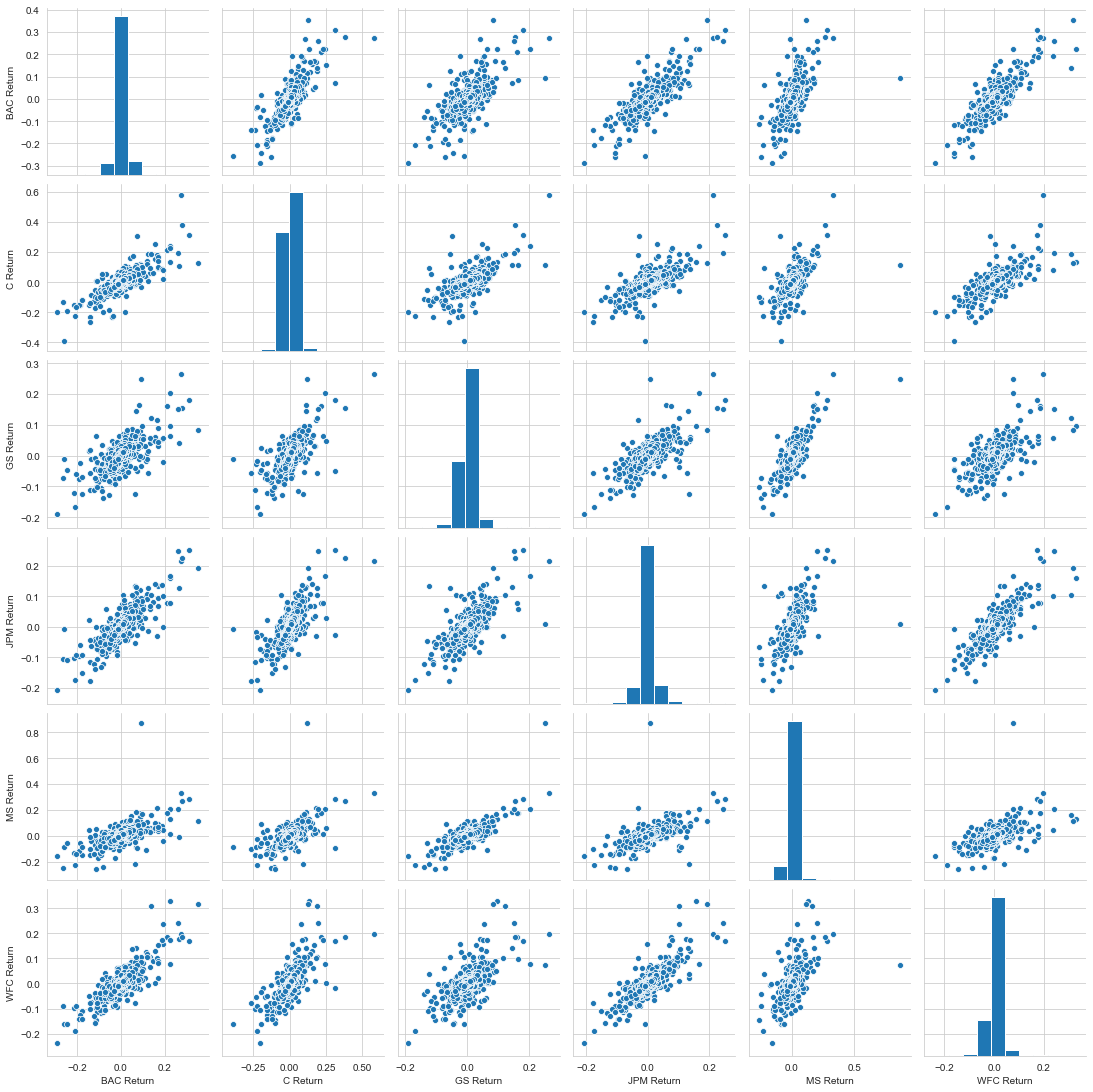

In [79]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [80]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [81]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** We will now plot the standard deviation of all the Banks**

In [82]:
returns.std() # Citigroup riskiest

BAC Return    0.036605
C Return      0.038615
GS Return     0.025369
JPM Return    0.027669
MS Return     0.037705
WFC Return    0.030221
dtype: float64

In [83]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016149
C Return      0.015280
GS Return     0.014027
JPM Return    0.013965
MS Return     0.016008
WFC Return    0.012547
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

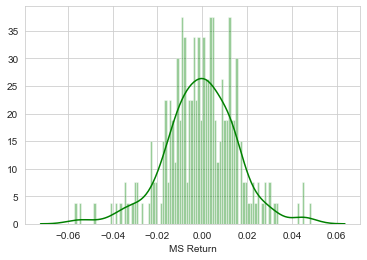

In [84]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

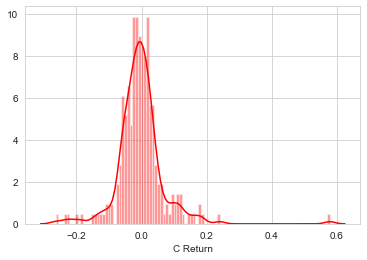

In [85]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

____
# More Visualization

A lot of this project will focus on visualizations.

### Imports

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import chart_studio.plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot 
import plotly.graph_objs as go
init_notebook_mode(connected=True)
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time.

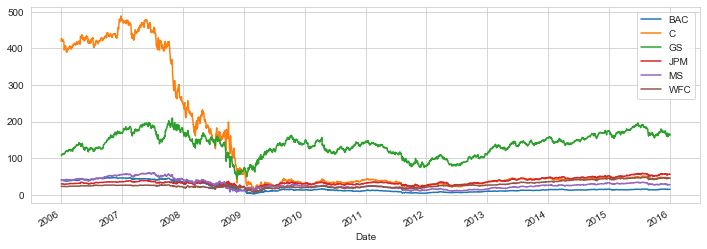

In [87]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

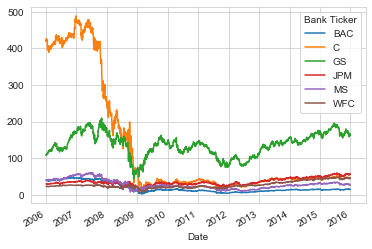

In [88]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [89]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

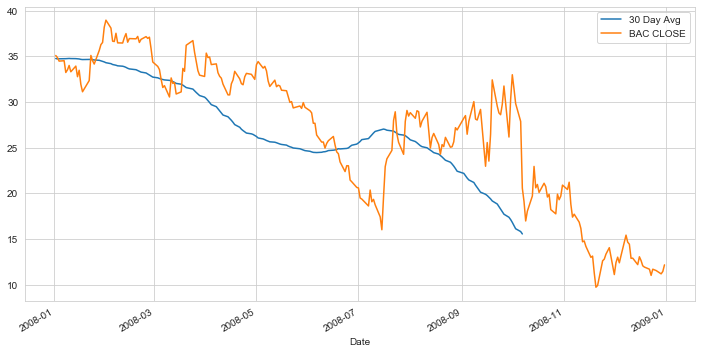

In [97]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2009-01-01':'2008-01-01'].rolling(window=60).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2009-01-01':'2008-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

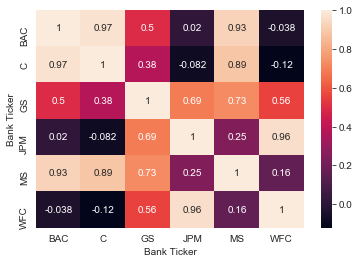

In [91]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Use seaborn's clustermap to cluster the correlations together:**

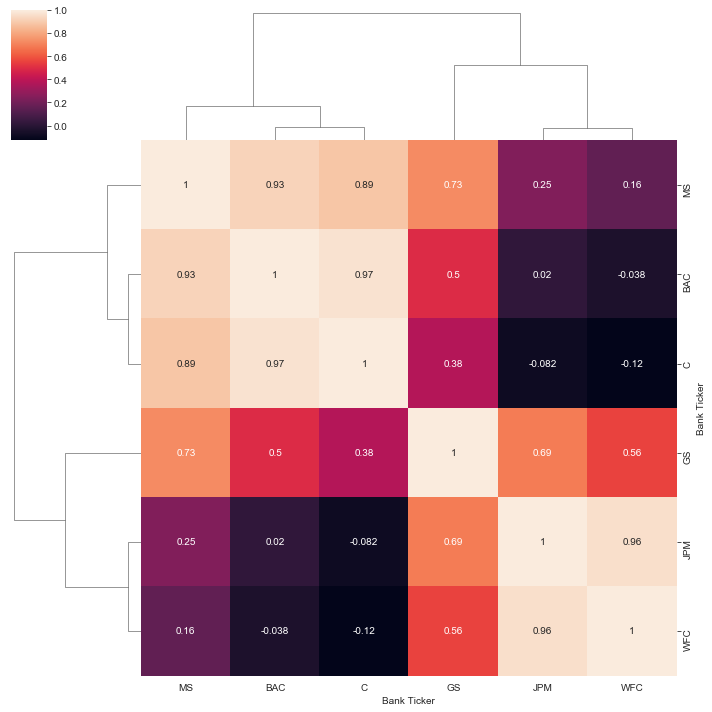

In [92]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [93]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [98]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2016-01-01':'2015-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [99]:
MS['Close'].loc['2016-01-01':'2015-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [100]:
BAC['Close'].loc['2016-01-01':'2015-01-01'].ta_plot(study='boll')